In [1]:
import pandas as pd
import numpy as np 
import os
os.chdir('../..')
melodic_dir='derivatives/Tensor_ICA/Tensor_output_background.ica/'

In [2]:
T_modes=melodic_dir+'melodic_Tmodes'
T_data=pd.read_csv(T_modes,header=None,delim_whitespace=True)

In [3]:
file_list=[melodic_dir+'report/t%s.txt'%(IC) for IC in range(1,55)]
img_list=[melodic_dir+'stats/thresh_zstat%s.nii.gz'%(i) for i in range(1,55)]

In [4]:
subs=[217,214,215,213,210,211,218,219,234,231,189,
      203,207,209,208,228,227,225,223,222,221,220]
print len(subs)

22


In [5]:

means=[]
sds=[]
for IC_data in file_list:
    df=pd.read_csv(IC_data,delim_whitespace=True,header=None)
    df['cond']=np.repeat([1,2,3,4],232)
    means.append(df.groupby('cond').mean())
    sds.append(df.groupby('cond').std())

In [6]:
from scipy.stats import ttest_rel
#because the print function in python 3 is better. wierd
from __future__ import print_function
full_res=[]
of_interest=[]
for index in range(len(means)):
    print(index)
    #Clear out a "results" variable
    res=[]
    #make temporary df's for the IC of interest
    x=sds[index]
    x=x.transpose(copy=True)
    x=x.iloc[1:]
    x['subs']=subs
    #display(x.head())

    #We want these in a format where they are [subs X cond]
    #add in a subject variable so we can make paired t-tests
    #get rid of the first entry because it's sort of a mean  variable
    
    y=means[index]
    y=y.transpose(copy=True)
    y=y.iloc[1:]
    y['subs']=subs
    
    y=y.melt(id_vars='subs')
    x=x.melt(id_vars='subs')
    
    #run all paired related t-tests and 
    std_1v2=ttest_rel(x[x['cond']==1].value,x[x['cond']==2].value)
    std_1v3=ttest_rel(x[x['cond']==1].value,x[x['cond']==3].value)
    std_1v4=ttest_rel(x[x['cond']==1].value,x[x['cond']==4].value)
    std_2v3=ttest_rel(x[x['cond']==2].value,x[x['cond']==3].value)
    std_2v4=ttest_rel(x[x['cond']==2].value,x[x['cond']==4].value)
    std_3v4=ttest_rel(x[x['cond']==3].value,x[x['cond']==4].value)
    std_res=[std_1v2,std_1v3,std_1v4,
         std_2v3,std_2v4,
         std_3v4]
    
    #Now for the Mean comparisons
    #run all paired related t-tests and 
    mean_1v2=ttest_rel(y[y['cond']==1].value,y[y['cond']==2].value)
    mean_1v3=ttest_rel(y[y['cond']==1].value,y[y['cond']==3].value)
    mean_1v4=ttest_rel(y[y['cond']==1].value,y[y['cond']==4].value)
    mean_2v3=ttest_rel(y[y['cond']==2].value,y[y['cond']==3].value)
    mean_2v4=ttest_rel(y[y['cond']==2].value,y[y['cond']==4].value)
    mean_3v4=ttest_rel(y[y['cond']==3].value,y[y['cond']==4].value)
    mean_res=[mean_1v2,mean_1v3,mean_1v4,
         mean_2v3,mean_2v4,
         mean_3v4]
    
    
    
    std_stats=[std_res[i][0] for i in range(len(std_res)) ]
    std_pvals=[std_res[i][1] for i in range(len(std_res)) ]
    mean_stats=[mean_res[i][0] for i in range(len(mean_res)) ]
    mean_pvals=[mean_res[i][1] for i in range(len(mean_res)) ]
    test=['Both_vs_RTPJ','Both_vs_Sham','Both_vs_VLPFC',
          'RTPJ_vs_Sham','RTPJ_vs_VLPFC','Sham_vs_VLPFC']
    df_res=pd.DataFrame({'test':test,'std_stats':std_stats, 'std_pvals':std_pvals,
                        'mean_stats':mean_stats,'mean_pvals':mean_pvals})
    full_res.append(df_res)
    if np.min([df_res['std_pvals'],df_res['mean_pvals']])<0.05:
        print("SOMETHING WAS SIGNIFICANT AND MY INDEX IS %s"%index)
        of_interest.append(index)

  

0
1
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 1
2
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 2
3
4
5
6
7
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 7
8
9
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 9
10
11
12
13
14
15
16
17
18
19
20
21
22
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 22
23
24
25
26
27
28
29
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 29
30
31
32
33
34
35
36
37
38
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 38
39
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 39
40
41
42
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 42
43
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 43
44
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 44
45
46
47
48
49
50
51
SOMETHING WAS SIGNIFICANT AND MY INDEX IS 51
52
53


IC: 2


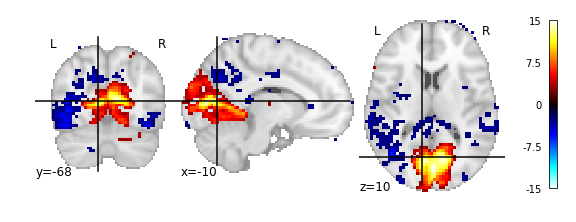

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.651365,0.458413,0.307908,-1.04499,Both_vs_RTPJ
1,0.835002,0.210895,0.355265,-0.945282,Both_vs_Sham
2,0.865363,-0.171641,0.340594,0.975133,Both_vs_VLPFC
3,0.6752,-0.424944,0.711265,0.375212,RTPJ_vs_Sham
4,0.695462,-0.396878,0.0370415,2.22672,RTPJ_vs_VLPFC
5,0.806751,-0.247728,0.0226507,2.45995,Sham_vs_VLPFC


IC: 3


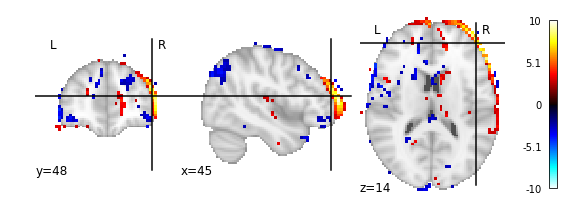

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.839156,-0.205506,0.720877,-0.362125,Both_vs_RTPJ
1,0.419865,0.822805,0.0758846,1.86728,Both_vs_Sham
2,0.930215,-0.0886304,0.912921,0.11068,Both_vs_VLPFC
3,0.3289,0.999565,0.0471387,2.10884,RTPJ_vs_Sham
4,0.90974,0.114742,0.618728,0.505129,RTPJ_vs_VLPFC
5,0.230894,-1.23384,0.149262,-1.49704,Sham_vs_VLPFC


IC: 8


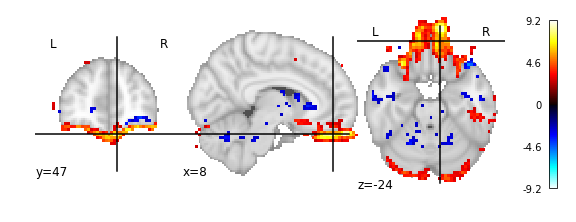

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.0957496,-1.74418,0.592512,-0.543496,Both_vs_RTPJ
1,0.448637,-0.772135,0.255448,-1.16914,Both_vs_Sham
2,0.736168,-0.341436,0.0364078,2.23506,Both_vs_VLPFC
3,0.469291,0.736977,0.865261,0.171772,RTPJ_vs_Sham
4,0.125505,1.59566,0.356001,0.943808,RTPJ_vs_VLPFC
5,0.58474,0.555028,0.0609531,1.98004,Sham_vs_VLPFC


IC: 10


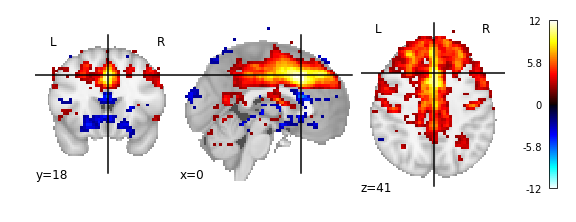

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.289074,-1.08765,0.014881,-2.65292,Both_vs_RTPJ
1,0.768289,-0.298456,0.362214,-0.931435,Both_vs_Sham
2,0.7774,-0.286372,0.270782,-1.13106,Both_vs_VLPFC
3,0.502858,0.681732,0.00828151,2.91484,RTPJ_vs_Sham
4,0.689229,0.405476,0.279797,1.10941,RTPJ_vs_VLPFC
5,0.843158,-0.20032,0.559094,-0.593639,Sham_vs_VLPFC


IC: 23


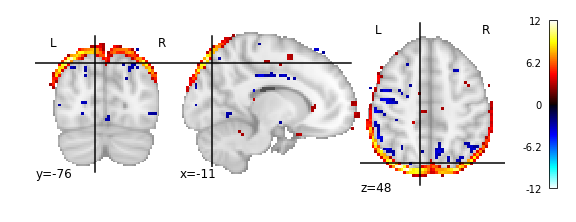

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.632318,-0.485543,0.18351,-1.37538,Both_vs_RTPJ
1,0.11329,1.65258,0.251196,-1.18,Both_vs_Sham
2,0.270004,1.13295,0.557108,-0.596667,Both_vs_VLPFC
3,0.0384536,2.20859,0.43559,0.794854,RTPJ_vs_Sham
4,0.182282,1.37941,0.346423,0.963171,RTPJ_vs_VLPFC
5,0.308529,-1.04361,0.882537,0.149562,Sham_vs_VLPFC


IC: 30


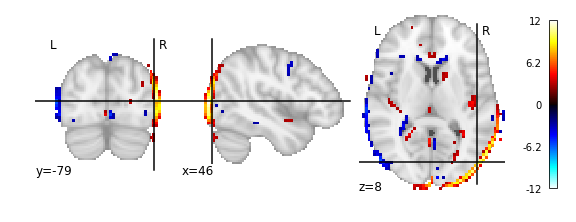

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.738811,0.337876,0.0146725,-2.65932,Both_vs_RTPJ
1,0.048182,-2.09801,0.804423,-0.250779,Both_vs_Sham
2,0.258722,-1.16087,0.497375,-0.690608,Both_vs_VLPFC
3,0.183466,-1.37552,0.00655888,3.01719,RTPJ_vs_Sham
4,0.348372,-0.9592,0.159675,1.45785,RTPJ_vs_VLPFC
5,0.150814,1.49106,0.542949,-0.618419,Sham_vs_VLPFC


IC: 39


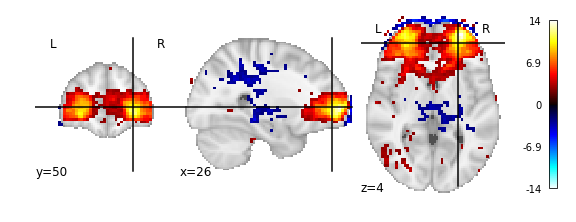

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.24511,-1.19578,0.217758,-1.27063,Both_vs_RTPJ
1,0.140678,1.53107,0.738412,-0.338413,Both_vs_Sham
2,0.542704,-0.618799,0.153825,1.4796,Both_vs_VLPFC
3,0.0167303,2.59961,0.401653,0.856012,RTPJ_vs_Sham
4,0.497314,0.690707,0.0808743,1.83394,RTPJ_vs_VLPFC
5,0.024987,-2.41409,0.204572,1.30932,Sham_vs_VLPFC


IC: 40


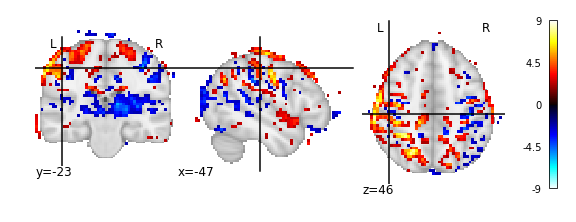

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.430561,0.803723,0.833344,-0.213048,Both_vs_RTPJ
1,0.967423,-0.0413299,0.791905,-0.267222,Both_vs_Sham
2,0.0758812,1.86731,0.398019,-0.862754,Both_vs_VLPFC
3,0.19975,-1.32395,0.955092,0.0569893,RTPJ_vs_Sham
4,0.0228974,2.4549,0.619223,-0.504412,RTPJ_vs_VLPFC
5,0.00184544,3.56119,0.507491,-0.674276,Sham_vs_VLPFC


IC: 43


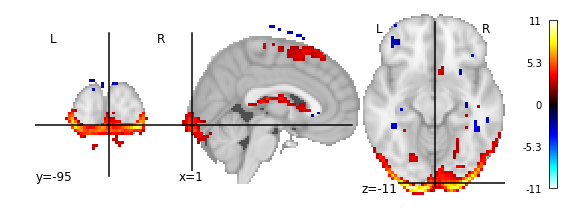

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.473688,-0.729612,0.405816,-0.848337,Both_vs_RTPJ
1,0.401952,-0.855459,0.473393,-0.730104,Both_vs_Sham
2,0.356711,-0.942385,0.853219,-0.187305,Both_vs_VLPFC
3,0.795602,0.262358,0.387305,0.882864,RTPJ_vs_Sham
4,0.0409309,-2.17821,0.343686,0.96877,RTPJ_vs_VLPFC
5,0.28096,-1.10665,0.582469,0.558412,Sham_vs_VLPFC


IC: 44


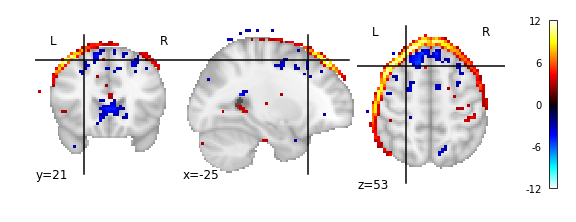

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.336626,0.983358,0.212106,1.28698,Both_vs_RTPJ
1,0.839907,-0.204533,0.629699,0.489302,Both_vs_Sham
2,0.14875,-1.49903,0.238657,1.21284,Both_vs_VLPFC
3,0.274797,-1.12135,0.348607,-0.958722,RTPJ_vs_Sham
4,0.0351456,-2.25207,0.947358,0.0668189,RTPJ_vs_VLPFC
5,0.193707,-1.34269,0.320265,1.018,Sham_vs_VLPFC


IC: 45


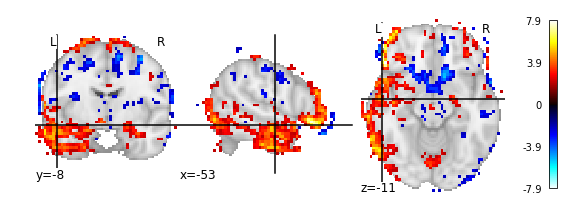

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.286316,1.09407,0.35729,0.941228,Both_vs_RTPJ
1,0.15246,1.48477,0.0147753,2.65615,Both_vs_Sham
2,0.170049,1.42082,0.334815,-0.987134,Both_vs_VLPFC
3,0.378174,-0.900292,0.984689,0.0194199,RTPJ_vs_Sham
4,0.370549,-0.915059,0.313948,-1.0317,RTPJ_vs_VLPFC
5,0.756336,-0.314378,0.194628,-1.3398,Sham_vs_VLPFC


IC: 52


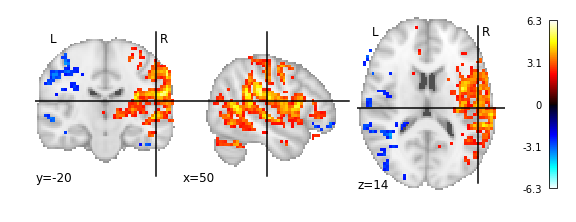

,mean_pvals,mean_stats,std_pvals,std_stats,test
0,0.422473,0.818124,0.301219,1.05992,Both_vs_RTPJ
1,0.0481895,2.09793,0.247202,1.19032,Both_vs_Sham
2,0.400389,0.858354,0.47396,0.729157,Both_vs_VLPFC
3,0.141634,1.5272,0.349884,-0.956133,RTPJ_vs_Sham
4,0.849145,-0.192571,0.323706,-1.01061,RTPJ_vs_VLPFC
5,0.227976,-1.24187,0.942004,-0.0736269,Sham_vs_VLPFC


In [9]:
from nilearn import plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#figure(num=None, figsize=(20, 10), dpi=160, facecolor='w', edgecolor='k')
for i in of_interest:
    print("IC: %d"%(i+1))
    plotting.plot_stat_map(img_list[i])
    plt.show()
    display(full_res[i].style.apply(lambda x:["background: yellow" if v<0.05 else "" for v in x],
                   subset=['mean_pvals','std_pvals']))

In [8]:
of_interest


[1, 2, 7, 9, 22, 29, 38, 39, 42, 43, 44, 51]